In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model as linm

In [2]:
boston = datasets.load_diabetes()

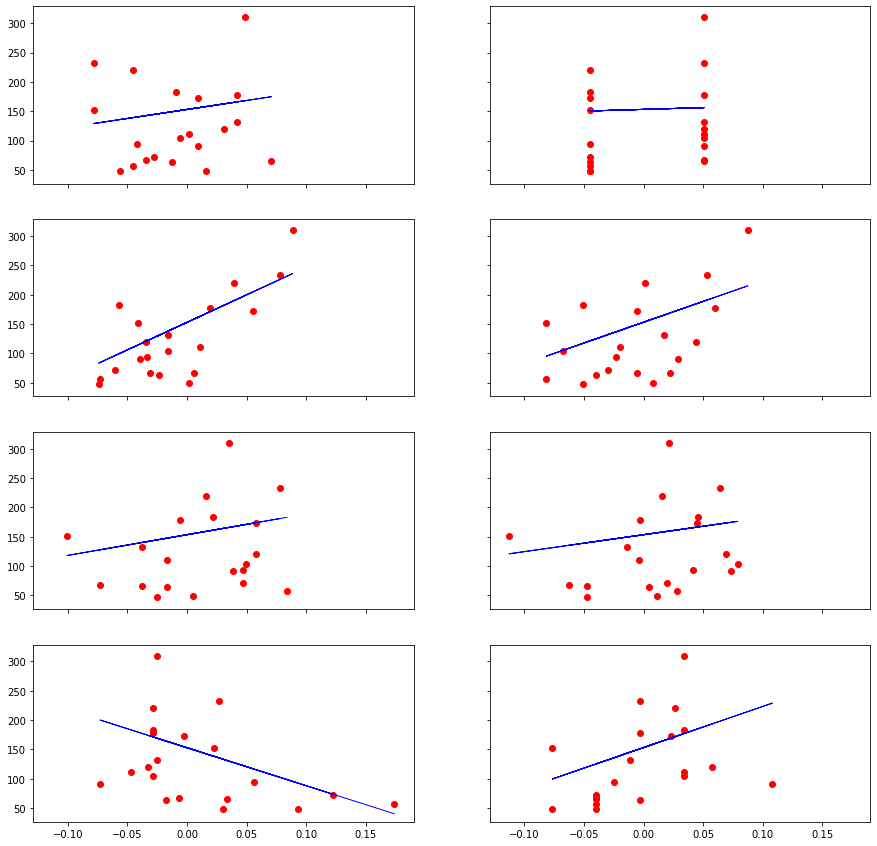

In [6]:
f, axarr = plt.subplots(4,2, sharex=True, sharey=True,figsize=(15,15))
for i in range(0,4):
    for j in range(0,2):
        boston_X = boston.data[:, np.newaxis, i*2+j]
        
        boston_dataset_X_train = boston_X[:-20]
        boston_dataset_X_test = boston_X[-20:]
        
        boston_dataset_y_train = boston.target[:-20]
        boston_dataset_y_test = boston.target[-20:]
        
        regr = linm.LinearRegression()
        
        regr.fit(boston_dataset_X_train, boston_dataset_y_train)
        
        axarr[i,j].scatter(boston_dataset_X_test, boston_dataset_y_test,  color='red')
        axarr[i,j].plot(boston_dataset_X_test, regr.predict(boston_dataset_X_test), color='blue', linewidth=1)
plt.show()

In [8]:
diabetes = datasets.load_boston()

print(diabetes.DESCR)

diabetes_X = diabetes.data
diabetes_Y = diabetes.target

diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]

diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:

    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)

    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_

    wl1 = np.sum(np.abs(w))

    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=10.960410679423
  wl1=27.44644771106094
  wl2=18.30257967932424
  w=[-1.05618627e-01  4.91381113e-02  3.21540897e-02  2.51293737e+00
 -1.76280019e+01  3.81765978e+00  1.05792271e-02 -1.43608998e+00
  3.61498721e-01 -1.54712068e-02 -9.12347239e-01  9.85932090e-03
 -5.55092176e-01]
 
Ridge
----------
  mse=11.195127507244013
  wl1=22.455522943462604
  wl2=13.721374175259173
  w=[-1.02102273e-01  5.02013578e-02  8.80018592e-03  2.44957291e+00
 -1.28232742e+01  3.84148840e+00  6.44215775e-03 -1.37722226e+00
  3.53296950e-01 -1.62693966e-02 -8.55851103e-01  9.89548869e-03
 -5.61106278e-01]
 
Lasso
----------
  mse=15.16642047020635
  wl1=0.8815286487451344
  wl2=0.7836759400442239
  w=[-0.          0.04108094 -0.          0.          0.          0.
  0.04466578 -0.          0.         -0.00861893 -0.          0.0059101
 -0.7812529 ]
 
ElNet
----------
  mse=13.894251181932834
  wl1=4.906963287634066
  wl2=2.348667810255262
  w=[-0.08762685  0.05765551 -0.03325711  0.

In [33]:
ludnosc =[2908457.00, 2090836.00,
2151836.00,
1020767.00,
2508464.00,
3364176.00,
5324519.00,
1002575.00,
2128483.00,
1193348.00,
2298811.00,
4593358.00,
1265415.00,
1445478.00,
3469464.00,
1717970.00]

In [34]:
malzenstwa = [13599.00, 
     10294.00, 
     10911.00, 
     4875.00, 
     11405.00, 
     17361.00, 
     24924.00, 
     4822.00, 
     11287.00, 
     6135.00, 
     11461.00, 
     22765.00, 
     6051.00 , 
     6978.00, 
     17437.00,
     8183.00]

In [29]:
ludnosc_train = ludnosc[:-50]
ludnosc_test = ludnosc[-50:]

malzenstwa_train = malzenstwa[:-50]
malzenstwa_test = malzenstwa[-50:]

In [31]:
from sklearn.model_selection import train_test_split

In [40]:
import pandas as pd

In [43]:
malzenstwa = pd.read_csv('malzenstwa.csv', sep=';', encoding='iso-8859-1')

In [45]:
ludnosc = malzenstwa.ludnosc
malzenstwa_count = malzenstwa.malzenstwa

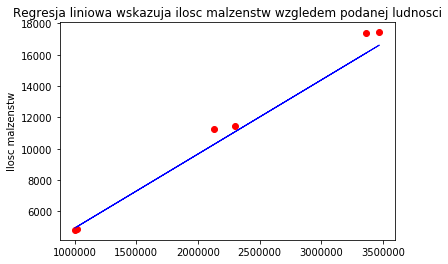

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(ludnosc, malzenstwa_count, test_size=0.33)

regr = linm.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja ilosc malzenstw wzgledem podanej ludnosci')
plt.ylabel('Ilosc malzenstw')
plt.show()

In [48]:
data = {'Dochody':[210,
270,
290,
310,
370,
400,
450,
480,
510,
520], 'Wydatki':[140,
190,
250,
270,
290,
310,
340,
360,
420,
390]} 

In [49]:
df = pd.DataFrame(data) 

In [51]:
dochody = df.Dochody
wydatki = df.Wydatki

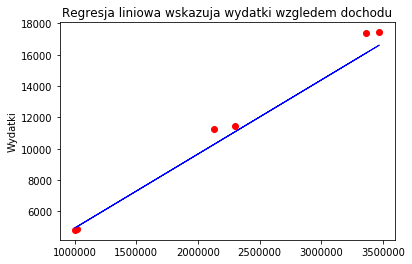

In [52]:

regr = linear_model.LinearRegression()

regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
        
plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa wskazuja wydatki wzgledem dochodu')
plt.ylabel('Wydatki')
plt.show()

In [53]:
random_array = np.random.uniform(0,1, size=(2, 100))

In [54]:
print('Średnie dla x oraz y')
x_srednia = random_array[0,:].mean()
print(x_srednia)
y_srednia = random_array[1,:].mean()
print(y_srednia)

Średnie dla x oraz y
0.5147702480853392
0.45815465942134226


In [55]:
print('Odjęte wartości średnich od x oraz y')
x_minus_x_srednia = np.array([x - x_srednia for x in random_array[0,:]])
y_minus_y_srednia = np.array([y - y_srednia for y in random_array[1,:]])

Odjęte wartości średnich od x oraz y


In [56]:
print('Kwadrat powyższych wartości')
x_minus_x_srednia_square = np.square(x_minus_x_srednia)
y_minus_y_srednia_square = np.square(y_minus_y_srednia)

Kwadrat powyższych wartości


In [57]:
product = x_minus_x_srednia_square * y_minus_y_srednia_square

In [60]:
result_df = pd.DataFrame(data = {'x' : random_array[0,:], 'y' : random_array[1,:], 'x-x_srednia': x_minus_x_srednia, 
                                 'y-y_srednia': y_minus_y_srednia, '(x-x_srednia)^2': x_minus_x_srednia_square,'(y-y_srednia)^2': y_minus_y_srednia_square,
                                  '(x-x_srednia) * (y-y_srednia)' : product})

In [61]:
print(x_srednia)
print(y_srednia)
result_df

0.5147702480853392
0.45815465942134226


,x,y,x-x_srednia,y-y_srednia,(x-x_srednia)^2,(y-y_srednia)^2,(x-x_srednia) * (y-y_srednia)
0,0.661708,0.133220,0.146938,-0.324935,0.021591,0.105583,0.002280
1,0.488487,0.710997,-0.026283,0.252842,0.000691,0.063929,0.000044
2,0.016022,0.725155,-0.498748,0.267000,0.248749,0.071289,0.017733
3,0.256903,0.674835,-0.257868,0.216681,0.066496,0.046951,0.003122
4,0.864107,0.246364,0.349337,-0.211791,0.122036,0.044855,0.005474
...,...,...,...,...,...,...,...
95,0.579851,0.785601,0.065081,0.327447,0.004235,0.107221,0.000454
96,0.535947,0.095410,0.021177,-0.362745,0.000448,0.131584,0.000059
97,0.921471,0.684317,0.406701,0.226162,0.165406,0.051149,0.008460
98,0.129503,0.109480,-0.385268,-0.348675,0.148431,0.121574,0.018045


In [62]:
a = result_df['(x-x_srednia) * (y-y_srednia)'].sum() / result_df['(x-x_srednia)^2'].sum()

In [63]:
b = y_srednia - a * x_srednia

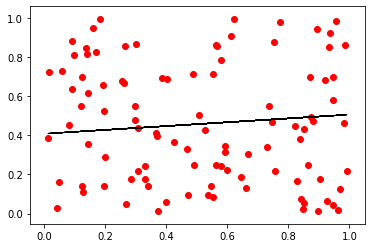

In [64]:
plt.scatter(random_array[0,:], random_array[1,:],  color='red')
plt.plot(random_array[0,:], a * random_array[0,:] + b, color='black', linewidth=1)
plt.show()